###  Data Understanding and Preprocessing

In [4]:
#pandas library
import pandas as pd

# Load the dataset
df = pd.read_csv('EU_energy_data.csv')

# Display the first few rows
print(df.head())

   Unnamed: 0       fecha  hora sistema  bandera  precio  tipo_moneda  \
0           0  2010-07-21     1      HU        1  39.287            1   
1           1  2010-07-21     2      HU        1  35.925            1   
2           2  2010-07-21     3      HU        1  33.223            1   
3           3  2010-07-21     4      HU        1  30.842            1   
4           4  2010-07-21     5      HU        1  33.395            1   

   origen_dato  fecha_actualizacion  
0            6  2021-10-01 12:39:53  
1            6  2021-10-01 12:39:53  
2            6  2021-10-01 12:39:53  
3            6  2021-10-01 12:39:53  
4            6  2021-10-01 12:39:53  


In [5]:
# Rename columns
df.rename(columns={
    "fecha": "date",
    "hora": "hour",
    "sistema": "EU_country",
    "bandera": "is_green_energy",
    "precio": "price_eur_per_mwh",
    "tipo_moneda": "currency_type",
    "origen_dato": "data_source",
    "fecha_actualizacion": "last_updated"
}, inplace=True)
df = df.drop('Unnamed: 0',axis=1)

# Display the first few rows
print(df.head())

         date  hour EU_country  is_green_energy  price_eur_per_mwh  \
0  2010-07-21     1         HU                1             39.287   
1  2010-07-21     2         HU                1             35.925   
2  2010-07-21     3         HU                1             33.223   
3  2010-07-21     4         HU                1             30.842   
4  2010-07-21     5         HU                1             33.395   

   currency_type  data_source         last_updated  
0              1            6  2021-10-01 12:39:53  
1              1            6  2021-10-01 12:39:53  
2              1            6  2021-10-01 12:39:53  
3              1            6  2021-10-01 12:39:53  
4              1            6  2021-10-01 12:39:53  


In [6]:
# Display basic info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1831555 entries, 0 to 1831554
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   date               object 
 1   hour               int64  
 2   EU_country         object 
 3   is_green_energy    int64  
 4   price_eur_per_mwh  float64
 5   currency_type      int64  
 6   data_source        int64  
 7   last_updated       object 
dtypes: float64(1), int64(4), object(3)
memory usage: 111.8+ MB
None
               hour  is_green_energy  price_eur_per_mwh  currency_type  \
count  1.831555e+06     1.831555e+06       1.831555e+06   1.831555e+06   
mean   1.250061e+01     5.811756e-01       4.467074e+01   1.043176e+00   
std    6.923499e+00     4.933667e-01       4.058053e+01   2.032529e-01   
min    1.000000e+00     0.000000e+00      -1.153100e+02   1.000000e+00   
25%    6.000000e+00     0.000000e+00       2.705000e+01   1.000000e+00   
50%    1.300000e+01     1.000000e+00       3.652000e+01

## Understanding
1. is_green_energy is (0/1)
2. hour is in proper range(1-24)
3. Negative prices exist in prices
4. currency_type (1/2)=(EUR/USD)
5. No proper information about data_source
6. date format is object

In [8]:
#Checking missing values
df.isnull().sum()

date                 0
hour                 0
EU_country           0
is_green_energy      0
price_eur_per_mwh    0
currency_type        0
data_source          0
last_updated         0
dtype: int64

#### No Missing Values

In [10]:
#Discarding unnecessary Features
df.drop(columns=['data_source', 'last_updated'], inplace=True)
df.head()

,date,hour,EU_country,is_green_energy,price_eur_per_mwh,currency_type
0,2010-07-21,1,HU,1,39.287,1
1,2010-07-21,2,HU,1,35.925,1
2,2010-07-21,3,HU,1,33.223,1
3,2010-07-21,4,HU,1,30.842,1
4,2010-07-21,5,HU,1,33.395,1


In [11]:
#conversion of date to datetime format for easy usage
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")
print(df['date'].dtype)


datetime64[ns]


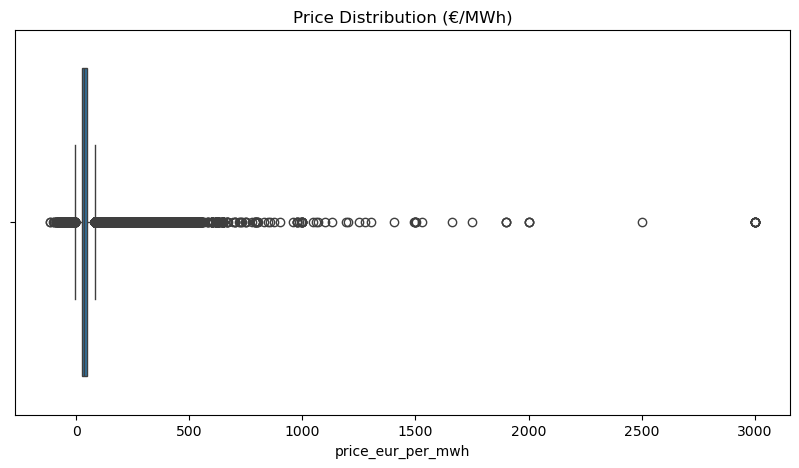

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to visualize price distribution
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['price_eur_per_mwh'])
plt.title('Price Distribution (€/MWh)')
plt.show()


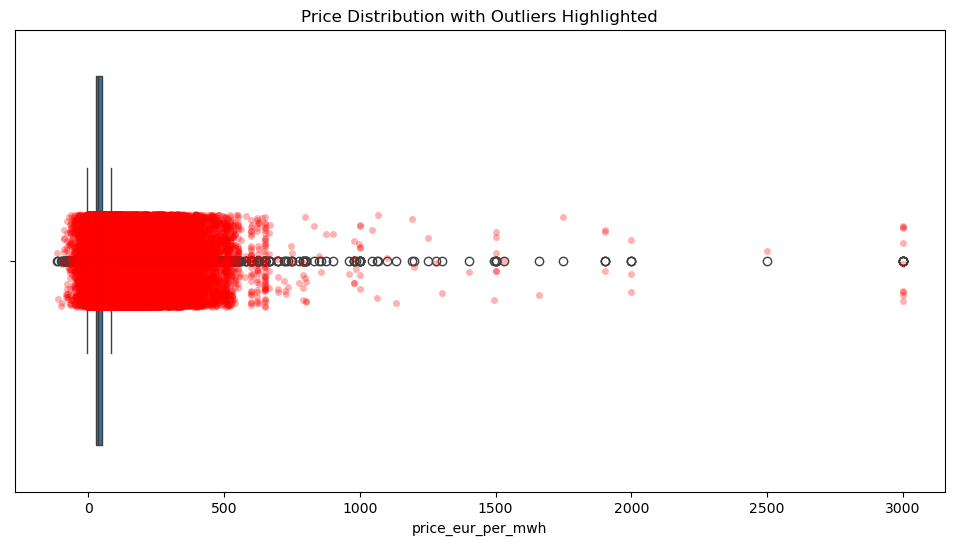

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['price_eur_per_mwh'])
sns.stripplot(x=df['price_eur_per_mwh'], color='red', alpha=0.3)  # Add individual points
plt.title('Price Distribution with Outliers Highlighted')
plt.show()


In [14]:
# Print the extreme values
print(df[df['price_eur_per_mwh'] > df['price_eur_per_mwh'].quantile(0.99)])  # Top 1% prices
print(df[df['price_eur_per_mwh'] < df['price_eur_per_mwh'].quantile(0.01)])  # Bottom 1% prices


              date  hour EU_country  is_green_energy  price_eur_per_mwh  \
633     2010-08-16    10         HU                1            2999.07   
634     2010-08-16    11         HU                1            2999.14   
635     2010-08-16    12         HU                1            2999.26   
636     2010-08-16    13         HU                1            2999.25   
637     2010-08-16    14         HU                1            2999.21   
...            ...   ...        ...              ...                ...   
1831476 2022-01-08    22       NORD                0             241.77   
1831479 2022-01-08    22       SARD                0             241.77   
1831484 2022-01-08    22       SICI                0             241.77   
1831485 2022-01-08    22        SUD                0             241.77   
1831499 2022-01-08    23         GB                0             234.93   

         currency_type  
633                  1  
634                  1  
635                  1  

-> there are continuous extreme values 
#### Keep the outliers as:
1. They could be valid high/low prices due to market fluctuations (supply & demand, inflation, energy crisis).
2. They might occur seasonally (e.g., winter/summer spikes due to demand).
3. They might contain useful insights for forecasting.

In [16]:
# Check unique values and their frequency
country_counts = df['EU_country'].value_counts()

# Display the number of unique countries
num_unique_countries = df['EU_country'].nunique()
print(f"Number of unique countries: {num_unique_countries}")

print(country_counts)

Number of unique countries: 36
EU_country
HU      100561
NO2      79079
SE3      79079
SE2      79079
SE1      79079
NO5      79079
NO4      79079
NO3      79079
NO1      79079
SYS      79079
LT       79079
GB       79079
FI       79079
DK1      79079
EE       79079
DK2      79079
SE4      79079
LV       75408
FR       70320
ES       70296
PT       70296
RS       51648
NL       22081
AT       22081
BE       22081
DE       22081
IT       15529
ELE       3671
CALA      2641
CNOR      2641
CSUD      2641
NORD      2641
SARD      2641
SICI      2641
SUD       2641
FRE       1751
Name: count, dtype: int64


In [17]:
# Country Mapping Dictionary
country_mapping = {
    'HU': 'Hungary', 'NO1': 'Norway', 'NO2': 'Norway', 'NO3': 'Norway', 'NO4': 'Norway', 'NO5': 'Norway',
    'SE1': 'Sweden', 'SE2': 'Sweden', 'SE3': 'Sweden', 'SE4': 'Sweden',
    'DK1': 'Denmark', 'DK2': 'Denmark', 
    'LT': 'Lithuania', 'LV': 'Latvia', 'EE': 'Estonia', 
    'FI': 'Finland', 'GB': 'United Kingdom', 'FR': 'France',
    'ES': 'Spain', 'PT': 'Portugal', 'NL': 'Netherlands', 'DE': 'Germany',
    'BE': 'Belgium', 'IT': 'Italy', 'AT': 'Austria', 'RS': 'Serbia',
    'SYS': 'System',  # System-wide Price
    'ELE': 'Unknown', 'CALA': 'Unknown', 'CNOR': 'Unknown', 
    'CSUD': 'Unknown', 'NORD': 'Unknown', 'SARD': 'Unknown', 
    'SICI': 'Unknown', 'SUD': 'Unknown', 'FRE': 'Unknown'
}

# Replace country codes with full country names
df['EU_country'] = df['EU_country'].replace(country_mapping)

# Check unique values after replacement
print(f"Unique Countries After Mapping: {df['EU_country'].nunique()}")
print(df['EU_country'].value_counts())

Unique Countries After Mapping: 20
EU_country
Norway            395395
Sweden            316316
Denmark           158158
Hungary           100561
System             79079
Estonia            79079
Finland            79079
United Kingdom     79079
Lithuania          79079
Latvia             75408
France             70320
Spain              70296
Portugal           70296
Serbia             51648
Unknown            23909
Austria            22081
Belgium            22081
Germany            22081
Netherlands        22081
Italy              15529
Name: count, dtype: int64


In [18]:
# Remove rows where EU_country is "System" or "Unknown"
df = df[~df['EU_country'].isin(['System', 'Unknown'])]

# Verify removal
print(df['EU_country'].unique())  # Should not contain 'System' or 'Unknown'
print(f"Remaining rows: {df.shape[0]}")
print(f"Unique Countries After Mapping and cleaning: {df['EU_country'].nunique()}")
print(df['EU_country'].value_counts())

['Hungary' 'Denmark' 'Estonia' 'Finland' 'United Kingdom' 'Lithuania'
 'Norway' 'Sweden' 'Latvia' 'Spain' 'France' 'Portugal' 'Serbia' 'Austria'
 'Belgium' 'Germany' 'Netherlands' 'Italy']
Remaining rows: 1728567
Unique Countries After Mapping and cleaning: 18
EU_country
Norway            395395
Sweden            316316
Denmark           158158
Hungary           100561
Estonia            79079
Finland            79079
United Kingdom     79079
Lithuania          79079
Latvia             75408
France             70320
Portugal           70296
Spain              70296
Serbia             51648
Austria            22081
Belgium            22081
Germany            22081
Netherlands        22081
Italy              15529
Name: count, dtype: int64


In [19]:
df.sample(10)

,date,hour,EU_country,is_green_energy,price_eur_per_mwh,currency_type
1233396,2019-07-19,22,United Kingdom,1,42.950,2
1344578,2020-01-14,1,Norway,0,23.150,1
1138263,2019-01-23,14,Norway,0,66.250,1
1023838,2018-06-20,22,Hungary,1,54.340,1
4074,2011-01-06,18,Hungary,0,62.045,1
1621688,2021-03-19,14,Estonia,0,51.010,1
1121878,2018-12-23,13,Portugal,0,65.180,1
592575,2016-03-26,2,Norway,0,20.540,1
811546,2017-05-14,20,Portugal,1,42.940,1
1009674,2018-05-25,2,Norway,1,34.170,1


#### Check Unique Values in currency_type

In [21]:
print(df['currency_type'].unique())  # Check all available currency types
print(df['currency_type'].value_counts())  # Count occurrences


[1 2]
currency_type
1    1649488
2      79079
Name: count, dtype: int64


In [22]:
print(df[df["currency_type"]==2])

              date  hour      EU_country  is_green_energy  price_eur_per_mwh  \
21486   2013-01-01     1  United Kingdom                0              49.92   
21504   2013-01-01     2  United Kingdom                0              37.08   
21522   2013-01-01     3  United Kingdom                0              37.76   
21540   2013-01-01     4  United Kingdom                0              30.01   
21558   2013-01-01     5  United Kingdom                0              21.98   
...            ...   ...             ...              ...                ...   
1831397 2022-01-08    20  United Kingdom                0             280.72   
1831431 2022-01-08    21  United Kingdom                0             235.98   
1831465 2022-01-08    22  United Kingdom                0             196.62   
1831499 2022-01-08    23  United Kingdom                0             234.93   
1831533 2022-01-08    24  United Kingdom                0             147.89   

         currency_type  
21486         

#### USD is only used for United Kingdom

In [24]:
#Since we can't get historical exchange rates for every timestamp accurately, it's better to remove records with non-EUR currency to maintain data consistency
df = df[df['currency_type'] == 1]  # Keep only EUR(1) records
df.drop(columns=['currency_type'], inplace=True)  # Remove column after filtering

In [25]:
df.sample(10)

,date,hour,EU_country,is_green_energy,price_eur_per_mwh
662908,2016-08-06,8,Latvia,1,30.14
295142,2014-08-19,4,Sweden,1,29.24
126451,2013-09-01,1,Norway,1,31.82
1425173,2020-05-20,8,Sweden,1,56.69
1238103,2019-07-27,11,Hungary,1,64.06
1008485,2018-05-22,20,Norway,1,40.50
1015715,2018-06-05,13,Estonia,1,64.83
631637,2016-06-08,3,Denmark,1,22.83
1534980,2020-11-05,18,Serbia,0,50.13
973236,2018-03-17,1,France,0,57.00


In [26]:
df['hour'] = df['hour'].astype(int)  # Ensure it's integer

#### Feature Engineering

In [28]:
#Negative Price Features
df['is_negative_price'] = (df['price_eur_per_mwh'] < 0).astype(int)
df['negative_price_duration'] = df['is_negative_price'] * (df['is_negative_price'].groupby((df['is_negative_price'] != df['is_negative_price'].shift()).cumsum()).cumcount() + 1)
df.sample(5)

,date,hour,EU_country,is_green_energy,price_eur_per_mwh,is_negative_price,negative_price_duration
1164369,2019-03-14,1,Estonia,0,35.18,0,0
1078660,2018-10-02,18,France,1,67.13,0,0
1101716,2018-11-15,9,France,0,74.44,0,0
671022,2016-08-21,17,France,1,8.21,0,0
314408,2014-09-26,10,Hungary,1,46.10,0,0


### Exploratory Data Analysis (EDA)

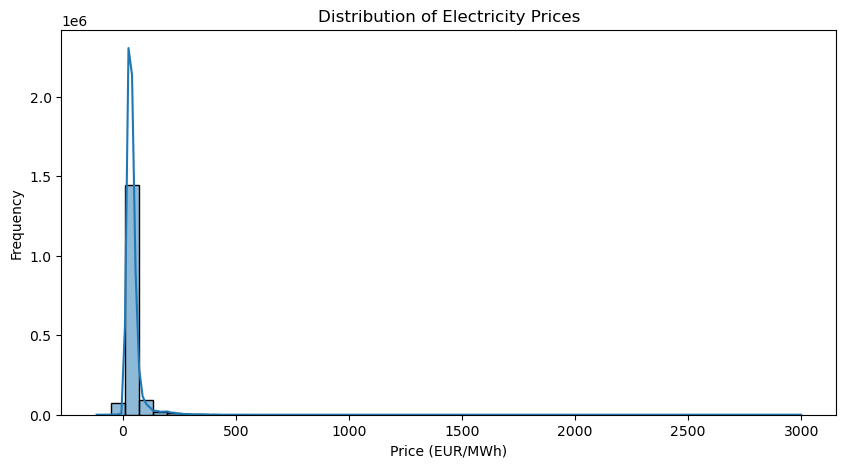

In [30]:
#overall distribution of electricity prices
import matplotlib.pyplot as plt  
import seaborn as sns  

plt.figure(figsize=(10,5))
sns.histplot(df['price_eur_per_mwh'], bins=50, kde=True)  
plt.xlabel("Price (EUR/MWh)")  
plt.ylabel("Frequency")  
plt.title("Distribution of Electricity Prices")  
plt.show()


#### mostly between -10 to +250 Approx.

In [32]:
#Negative Price Analysis
negative_price_count = df[df['price_eur_per_mwh'] < 0].shape[0]
total_count = df.shape[0]
negative_price_percentage = (negative_price_count / total_count) * 100
print(f"Negative prices occur in {negative_price_percentage:.2f}% of the records.")


Negative prices occur in 0.17% of the records.


In [33]:
#countries with negative prices most often
negative_price_by_country = df[df['price_eur_per_mwh'] < 0]['EU_country'].value_counts()
print(negative_price_by_country)

EU_country
Denmark        1198
Germany         510
Belgium         325
France          218
Austria         184
Netherlands     172
Hungary          86
Sweden           85
Norway           27
Finland          14
Estonia          10
Lithuania        10
Latvia           10
Name: count, dtype: int64


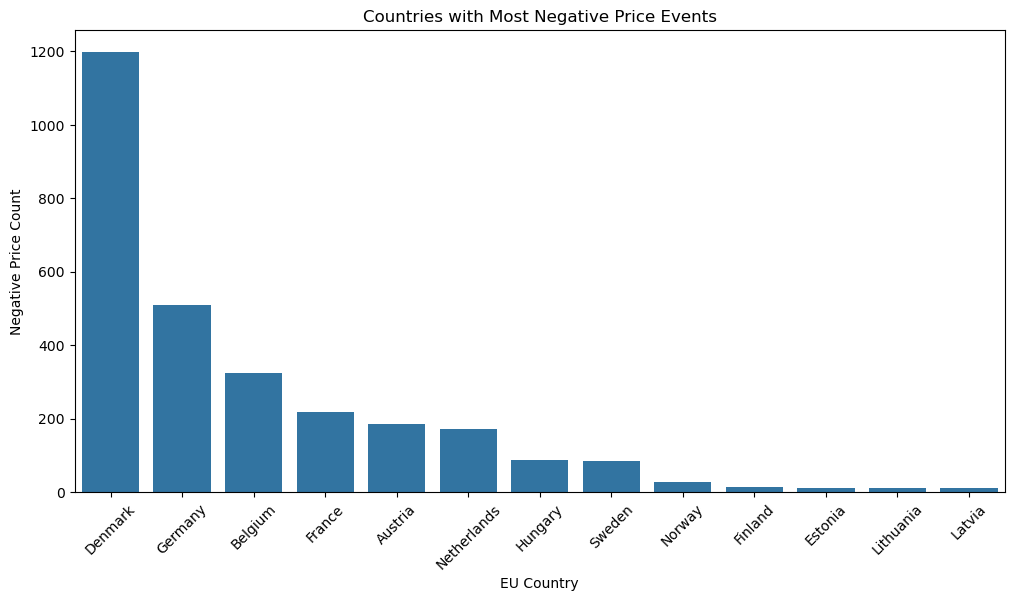

In [34]:
#Visualization of countries with most negative price occurrences
plt.figure(figsize=(12,6))
sns.barplot(x=negative_price_by_country.index, y=negative_price_by_country.values)
plt.xlabel("EU Country")
plt.ylabel("Negative Price Count")
plt.title("Countries with Most Negative Price Events")
plt.xticks(rotation=45)
plt.show()


In [35]:
#Green vs. Non-Green Energy Proportion
green_proportion = df['is_green_energy'].value_counts(normalize=True) * 100
print(green_proportion)


is_green_energy
1    58.435405
0    41.564595
Name: proportion, dtype: float64


In [36]:
#Price Comparison: Green vs. Non-Green Energy 
avg_price_green = df[df['is_green_energy'] == 1]['price_eur_per_mwh'].mean()
avg_price_non_green = df[df['is_green_energy'] == 0]['price_eur_per_mwh'].mean()

print(f"Average Price - Green Energy: {avg_price_green:.2f} EUR/MWh")
print(f"Average Price - Non-Green Energy: {avg_price_non_green:.2f} EUR/MWh")


Average Price - Green Energy: 40.96 EUR/MWh
Average Price - Non-Green Energy: 45.30 EUR/MWh


In [37]:
#Green Energy & Negative Pricing 
negative_green = df[(df['is_green_energy'] == 1) & (df['price_eur_per_mwh'] < 0)].shape[0]
negative_non_green = df[(df['is_green_energy'] == 0) & (df['price_eur_per_mwh'] < 0)].shape[0]

print(f"Negative Prices - Green Energy: {negative_green} occurrences")
print(f"Negative Prices - Non-Green Energy: {negative_non_green} occurrences")


Negative Prices - Green Energy: 1505 occurrences
Negative Prices - Non-Green Energy: 1344 occurrences


In [38]:
# Filter negative price occurrences
negative_prices = df[df['is_negative_price'] == 1]

# Count total negative price occurrences per country
total_negative_counts = negative_prices.groupby('EU_country').size()

# Count negative price occurrences where is_green_energy = 1
green_negative_counts = negative_prices[negative_prices['is_green_energy'] == 1].groupby('EU_country').size()

# Compute percentage of negative prices due to green energy
negative_green_percent = (green_negative_counts / total_negative_counts) * 100

# Display the result
negative_green_percent = negative_green_percent.fillna(0).sort_values(ascending=False)
print(negative_green_percent)

EU_country
Netherlands    80.813953
France         80.733945
Austria        79.891304
Belgium        73.538462
Norway         70.370370
Sweden         61.176471
Estonia        60.000000
Latvia         60.000000
Lithuania      60.000000
Germany        52.745098
Finland        42.857143
Denmark        34.390651
Hungary        32.558140
dtype: float64


/var/folders/01/6l702ltx5rv3gyxw0z7dh4yc0000gn/T/ipykernel_1495/3322249478.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(countries), y=list(percentages), palette="coolwarm")


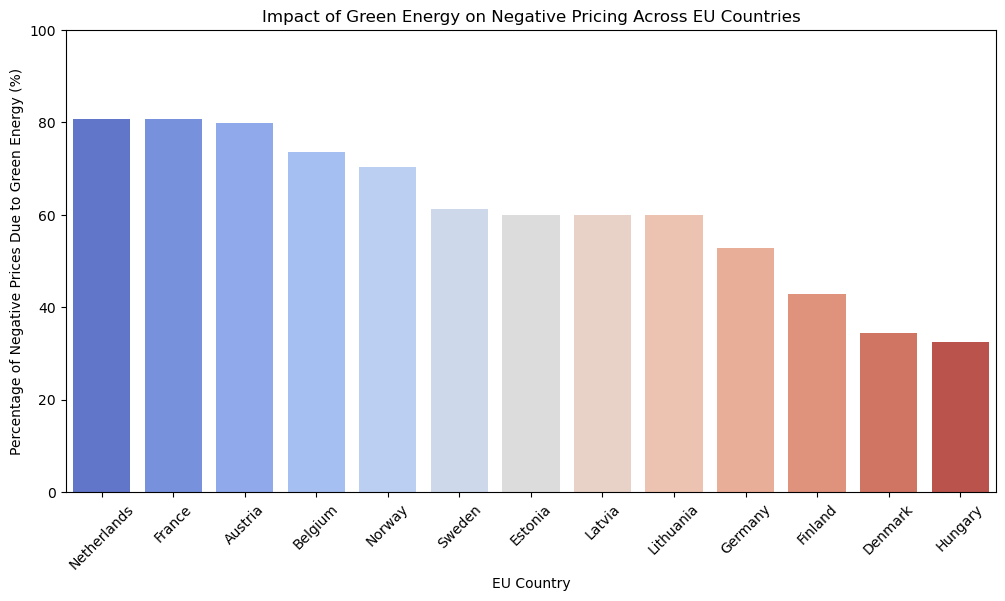

In [39]:
# data
negative_price_green_energy = negative_green_percent

# Sorting data for better visualization
countries, percentages = zip(*sorted(negative_price_green_energy.items(), key=lambda x: x[1], reverse=True))

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=list(countries), y=list(percentages), palette="coolwarm")

# Labels and Title
plt.xlabel("EU Country")
plt.ylabel("Percentage of Negative Prices Due to Green Energy (%)")
plt.title("Impact of Green Energy on Negative Pricing Across EU Countries")
plt.xticks(rotation=45)
plt.ylim(0, 100)

# Display plot
plt.show()

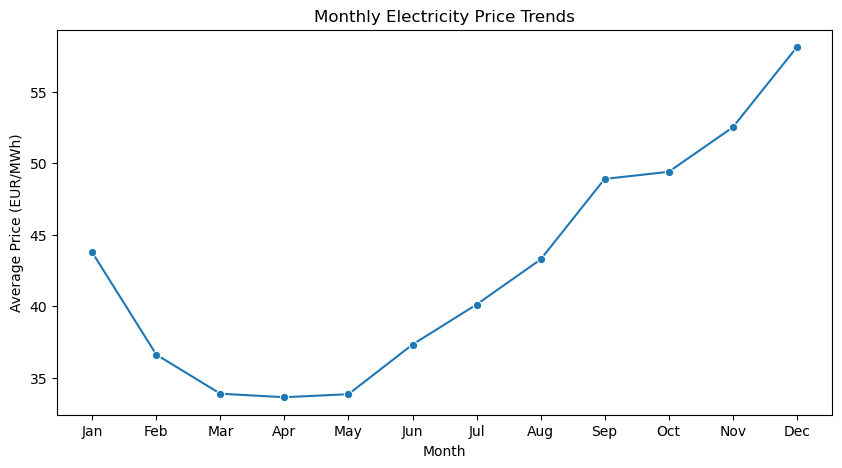

In [40]:
# Extract month from the date column
df['month'] = df['date'].dt.month

# Group by month and compute the average price
df_monthly = df.groupby('month')['price_eur_per_mwh'].mean()

# Plot the trend
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_monthly.index, y=df_monthly.values, marker='o')

# Formatting the plot
plt.xlabel("Month")
plt.ylabel("Average Price (EUR/MWh)")
plt.title("Monthly Electricity Price Trends")
plt.xticks(range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                 "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

plt.show()

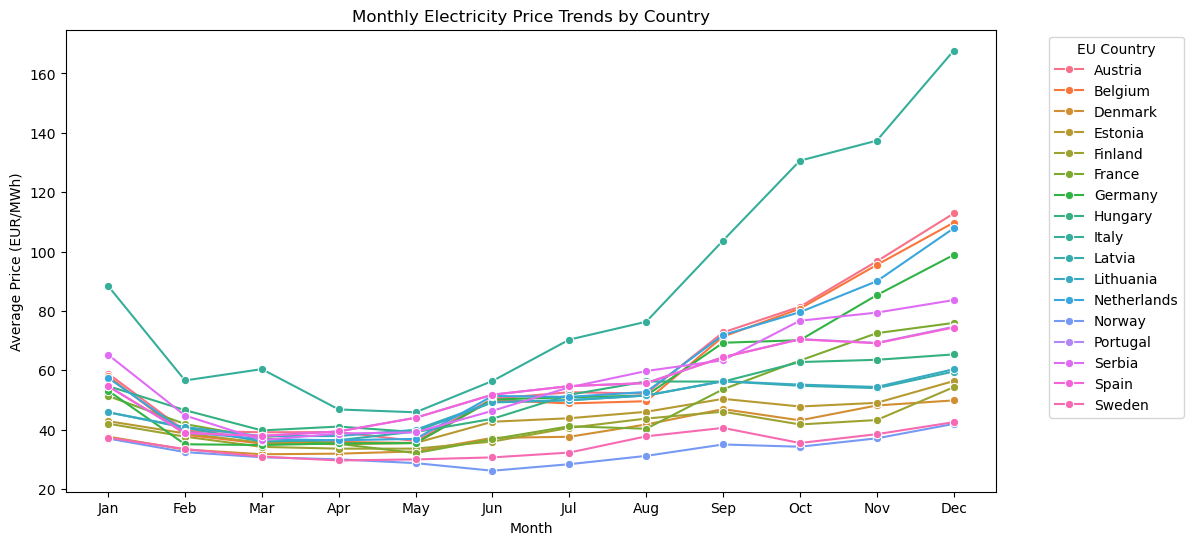

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by month and country, then compute the average price
df_monthly = df.groupby(['month', 'EU_country'])['price_eur_per_mwh'].mean().reset_index()

# Plot the trend for each country
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_monthly, x='month', y='price_eur_per_mwh', hue='EU_country', marker='o')

# Formatting the plot
plt.xlabel("Month")
plt.ylabel("Average Price (EUR/MWh)")
plt.title("Monthly Electricity Price Trends by Country")
plt.xticks(range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                 "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="EU Country", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


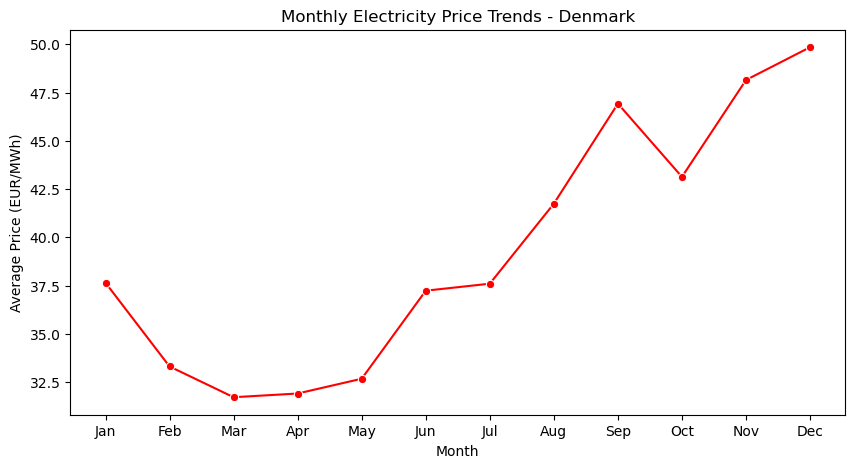

In [42]:
# Filter data for 
df_germany = df[df['EU_country'] == 'Denmark']

# Group by month and compute the average price for Germany
df_germany_monthly = df_germany.groupby('month')['price_eur_per_mwh'].mean().reset_index()

# Plot the trend for Germany
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_germany_monthly, x='month', y='price_eur_per_mwh', marker='o', color='red')

# Formatting the plot
plt.xlabel("Month")
plt.ylabel("Average Price (EUR/MWh)")
plt.title("Monthly Electricity Price Trends - Denmark")
plt.xticks(range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                 "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

# Show the plot
plt.show()


## Denmark has both a balanced trend and a significant number of negative price occurrences, making it a strong choice for forecasting.

In [44]:
# Filter for Denmark
df_denmark = df[df['EU_country'] == 'Denmark']

# Sort by date for time series processing
df_denmark = df_denmark.sort_values(by='date')

# Reset index
df_denmark = df_denmark.reset_index(drop=True)

# Save the filtered data (optional)
df_denmark.to_csv('denmark_data.csv', index=False)

# Display first few rows
print(df_denmark.head())

        date  hour EU_country  is_green_energy  price_eur_per_mwh  \
0 2013-01-01     1    Denmark                0              14.03   
1 2013-01-01    14    Denmark                0              31.02   
2 2013-01-01    14    Denmark                0              31.02   
3 2013-01-01    15    Denmark                0              32.36   
4 2013-01-01    15    Denmark                0              32.36   

   is_negative_price  negative_price_duration  month  
0                  0                        0      1  
1                  0                        0      1  
2                  0                        0      1  
3                  0                        0      1  
4                  0                        0      1  


In [45]:
# Sort the DataFrame by 'date' and 'hour'
df_denmark = df_denmark.sort_values(by=['date', 'hour']).reset_index(drop=True)
df_denmark.to_csv('denmark_data.csv', index=False)
# Display the first few rows to verify
print(df_denmark.head())


        date  hour EU_country  is_green_energy  price_eur_per_mwh  \
0 2013-01-01     1    Denmark                0              14.03   
1 2013-01-01     1    Denmark                0              14.03   
2 2013-01-01     2    Denmark                0              11.06   
3 2013-01-01     2    Denmark                0              11.06   
4 2013-01-01     3    Denmark                0               8.50   

   is_negative_price  negative_price_duration  month  
0                  0                        0      1  
1                  0                        0      1  
2                  0                        0      1  
3                  0                        0      1  
4                  0                        0      1  


In [46]:
# Check for exact duplicates
print(df_denmark.duplicated().sum())


56085


#### The presence of multiple rows with the same date and hour but different prices suggests that:
#### There could be multiple price records per hour (e.g., different price zones or subregions).
#### The data might have duplicates that need handling.
#### The dataset could include different market segments (e.g., day-ahead vs. real-time prices).

In [48]:
df_denmark = df_denmark.groupby(['date', 'hour'], as_index=False).agg({
    'price_eur_per_mwh': 'mean',
    'is_negative_price': 'max',
    'negative_price_duration': 'max',
    'is_green_energy': 'max'  # If any value is 1, keep 1
})

df_denmark.to_csv('denmark_data.csv', index=False)

# Display the first few rows to verify
print(df_denmark.head())

        date  hour  price_eur_per_mwh  is_negative_price  \
0 2013-01-01     1              14.03                  0   
1 2013-01-01     2              11.06                  0   
2 2013-01-01     3               8.50                  0   
3 2013-01-01     4               0.10                  0   
4 2013-01-01     5               2.01                  0   

   negative_price_duration  is_green_energy  
0                        0                0  
1                        0                0  
2                        0                0  
3                        0                0  
4                        0                0  


In [49]:
df_denmark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79070 entries, 0 to 79069
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     79070 non-null  datetime64[ns]
 1   hour                     79070 non-null  int64         
 2   price_eur_per_mwh        79070 non-null  float64       
 3   is_negative_price        79070 non-null  int64         
 4   negative_price_duration  79070 non-null  int64         
 5   is_green_energy          79070 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 3.6 MB


In [50]:
df_denmark.describe()

,date,hour,price_eur_per_mwh,is_negative_price,negative_price_duration,is_green_energy
count,79070,79070.000000,79070.000000,79070.000000,79070.000000,79070.000000
mean,2017-07-06 00:31:28.190211328,12.501227,39.350329,0.009574,0.023220,0.582168
min,2013-01-01 00:00:00,1.000000,-62.030000,0.000000,0.000000,0.000000
25%,2015-04-04 00:00:00,7.000000,25.460000,0.000000,0.000000,0.000000
50%,2017-07-06 00:00:00,13.000000,33.480000,0.000000,0.000000,1.000000
75%,2019-10-08 00:00:00,19.000000,44.590000,0.000000,0.000000,1.000000
max,2022-01-08 00:00:00,24.000000,1021.340000,1.000000,9.000000,1.000000
std,NaN,6.921805,32.264649,0.097377,0.266873,0.493205


In [51]:
# Ensure 'date' column is in datetime format
df_denmark['date'] = pd.to_datetime(df_denmark['date'])

# Set date as index for time series visualization
df_denmark = df_denmark.set_index('date')


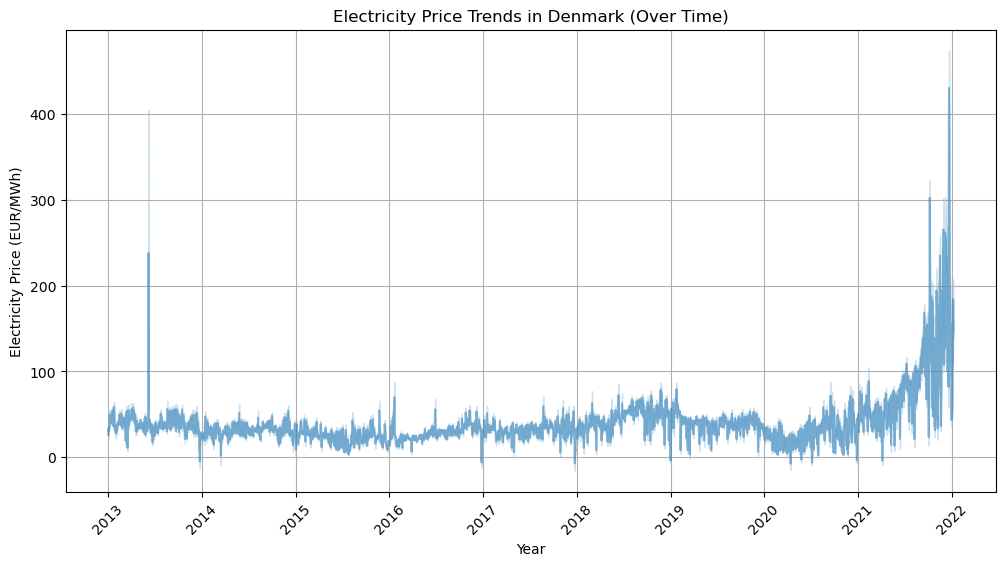

In [52]:
plt.figure(figsize=(12, 6))

# Line plot of electricity price over time
sns.lineplot(data=df_denmark, x=df_denmark.index, y='price_eur_per_mwh', alpha=0.5)

# Formatting
plt.xlabel("Year")
plt.ylabel("Electricity Price (EUR/MWh)")
plt.title("Electricity Price Trends in Denmark (Over Time)")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


In [53]:
df_denmark.sample(10)

,hour,price_eur_per_mwh,is_negative_price,negative_price_duration,is_green_energy
date,,,,,
2018-01-06,24,29.03,0,0,0
2013-02-03,10,36.87,0,0,0
2021-02-02,2,45.05,0,0,0
2018-02-23,13,42.77,0,0,0
2015-05-06,8,26.17,0,0,1
2020-09-04,19,47.95,0,0,1
2016-10-02,23,29.94,0,0,1
2021-02-23,19,58.37,0,0,0
2019-06-18,21,67.12,0,0,1


In [54]:
df_denmark.isnull().sum()


hour                       0
price_eur_per_mwh          0
is_negative_price          0
negative_price_duration    0
is_green_energy            0
dtype: int64

#### Feature Engineering Part-2

In [55]:
df_denmark['month'] = df_denmark.index.month
df_denmark['day_of_week'] = df_denmark.index.dayofweek

In [56]:
df_denmark.sample(5)

,hour,price_eur_per_mwh,is_negative_price,negative_price_duration,is_green_energy,month,day_of_week
date,,,,,,,
2013-08-29,9,63.250,0,0,1,8,3
2019-01-20,23,58.285,0,0,0,1,6
2013-03-29,4,33.000,0,0,0,3,4
2014-09-14,13,34.510,0,0,1,9,6
2019-09-06,15,31.775,0,0,1,9,4


In [57]:
import numpy as np

df_denmark['sine_hour'] = np.sin(2 * np.pi * (df_denmark['hour'] - 1) / 24)
df_denmark['cosine_hour'] = np.cos(2 * np.pi * (df_denmark['hour'] - 1) / 24)


In [58]:
df_denmark.sample(5)

,hour,price_eur_per_mwh,is_negative_price,negative_price_duration,is_green_energy,month,day_of_week,sine_hour,cosine_hour
date,,,,,,,,,
2021-03-14,6,14.070,0,0,0,3,6,0.965926,0.258819
2016-01-20,14,57.580,0,0,0,1,2,-0.258819,-0.965926
2017-10-15,2,28.315,0,0,1,10,6,0.258819,0.965926
2014-07-03,3,25.590,0,0,1,7,3,0.500000,0.866025
2018-12-05,23,48.570,0,0,0,12,2,-0.500000,0.866025


In [59]:
df_denmark['is_weekday'] = df_denmark['day_of_week'].apply(lambda x: 1 if x < 5 else 0)


In [60]:
df_denmark.sample(5)

,hour,price_eur_per_mwh,is_negative_price,negative_price_duration,is_green_energy,month,day_of_week,sine_hour,cosine_hour,is_weekday
date,,,,,,,,,,
2017-01-21,20,29.82,0,0,0,1,5,-0.965926,0.258819,0
2021-11-27,15,218.90,0,0,0,11,5,-0.500000,-0.866025,0
2021-01-11,21,37.11,0,0,0,1,0,-0.866025,0.500000,1
2016-04-27,20,24.54,0,0,1,4,2,-0.965926,0.258819,1
2016-01-29,24,10.29,0,0,0,1,4,-0.258819,0.965926,1


In [61]:
# Creating lagged features (e.g., 1, 2, 3 hours before)
for lag in range(1, 4):  # You can increase the range if needed
    df_denmark[f'price_lag_{lag}'] = df_denmark['price_eur_per_mwh'].shift(lag)


In [62]:
# 7-day moving average of price
df_denmark['price_rolling_7d'] = df_denmark['price_eur_per_mwh'].rolling(window=7, min_periods=1).mean()

# 30-day moving average of price
df_denmark['price_rolling_30d'] = df_denmark['price_eur_per_mwh'].rolling(window=30, min_periods=1).mean()


In [63]:
print(df_denmark[['price_eur_per_mwh', 'price_lag_1', 'price_lag_2', 'price_lag_3', 'price_rolling_7d', 'price_rolling_30d']].head(10))


            price_eur_per_mwh  price_lag_1  price_lag_2  price_lag_3  \
date                                                                   
2013-01-01              14.03          NaN          NaN          NaN   
2013-01-01              11.06        14.03          NaN          NaN   
2013-01-01               8.50        11.06        14.03          NaN   
2013-01-01               0.10         8.50        11.06        14.03   
2013-01-01               2.01         0.10         8.50        11.06   
2013-01-01              22.81         2.01         0.10         8.50   
2013-01-01              27.93        22.81         2.01         0.10   
2013-01-01              28.01        27.93        22.81         2.01   
2013-01-01              27.80        28.01        27.93        22.81   
2013-01-01              27.35        27.80        28.01        27.93   

            price_rolling_7d  price_rolling_30d  
date                                             
2013-01-01         14.030000       

In [64]:
#Price Difference from Previous Hour
#This helps identify sudden price spikes or drops
df_denmark['price_diff_1h'] = df_denmark['price_eur_per_mwh'].diff(1)  # Difference from previous hour


In [65]:
#Price Volatility (Standard Deviation over X Hours)
#This captures how much prices fluctuate, helping detect unstable periods
df_denmark['price_volatility_24h'] = df_denmark['price_eur_per_mwh'].rolling(window=24, min_periods=1).std()  # 24-hour volatility
df_denmark['price_volatility_7d'] = df_denmark['price_eur_per_mwh'].rolling(window=7*24, min_periods=1).std()  # 7-day volatility


In [66]:
print(df_denmark[['price_eur_per_mwh', 'price_diff_1h', 'price_volatility_24h', 'price_volatility_7d']].head(10))


            price_eur_per_mwh  price_diff_1h  price_volatility_24h  \
date                                                                 
2013-01-01              14.03            NaN                   NaN   
2013-01-01              11.06          -2.97              2.100107   
2013-01-01               8.50          -2.56              2.767532   
2013-01-01               0.10          -8.40              5.990840   
2013-01-01               2.01           1.91              5.928039   
2013-01-01              22.81          20.80              8.308919   
2013-01-01              27.93           5.12             10.234216   
2013-01-01              28.01           0.08             10.974356   
2013-01-01              27.80          -0.21             11.207728   
2013-01-01              27.35          -0.45             11.179605   

            price_volatility_7d  
date                             
2013-01-01                  NaN  
2013-01-01             2.100107  
2013-01-01             

In [67]:
df_denmark.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 79070 entries, 2013-01-01 to 2022-01-08
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hour                     79070 non-null  int64  
 1   price_eur_per_mwh        79070 non-null  float64
 2   is_negative_price        79070 non-null  int64  
 3   negative_price_duration  79070 non-null  int64  
 4   is_green_energy          79070 non-null  int64  
 5   month                    79070 non-null  int32  
 6   day_of_week              79070 non-null  int32  
 7   sine_hour                79070 non-null  float64
 8   cosine_hour              79070 non-null  float64
 9   is_weekday               79070 non-null  int64  
 10  price_lag_1              79069 non-null  float64
 11  price_lag_2              79068 non-null  float64
 12  price_lag_3              79067 non-null  float64
 13  price_rolling_7d         79070 non-null  float64
 14  price

## Modeling

In [69]:
# Reset the index to remove the 'date' from the index
df_denmark.reset_index(inplace=True)

# Replace '24' in 'hour' column with '00' to handle midnight of the next day
df_denmark['hour'] = df_denmark['hour'].replace(24, 0)

# Create a new 'datetime' column by combining 'date' and 'hour'
df_denmark['datetime'] = pd.to_datetime(df_denmark['date'].astype(str) + ' ' + df_denmark['hour'].astype(str) + ':00')

# Set the new 'datetime' column as the index
df_denmark.set_index('datetime', inplace=True)



In [70]:
df_denmark.head(5)

,date,hour,price_eur_per_mwh,is_negative_price,negative_price_duration,is_green_energy,month,day_of_week,sine_hour,cosine_hour,is_weekday,price_lag_1,price_lag_2,price_lag_3,price_rolling_7d,price_rolling_30d,price_diff_1h,price_volatility_24h,price_volatility_7d
datetime,,,,,,,,,,,,,,,,,,,
2013-01-01 01:00:00,2013-01-01,1,14.03,0,0,0,1,1,0.000000,1.000000,1,NaN,NaN,NaN,14.030000,14.030000,NaN,NaN,NaN
2013-01-01 02:00:00,2013-01-01,2,11.06,0,0,0,1,1,0.258819,0.965926,1,14.03,NaN,NaN,12.545000,12.545000,-2.97,2.100107,2.100107
2013-01-01 03:00:00,2013-01-01,3,8.50,0,0,0,1,1,0.500000,0.866025,1,11.06,14.03,NaN,11.196667,11.196667,-2.56,2.767532,2.767532
2013-01-01 04:00:00,2013-01-01,4,0.10,0,0,0,1,1,0.707107,0.707107,1,8.50,11.06,14.03,8.422500,8.422500,-8.40,5.990840,5.990840
2013-01-01 05:00:00,2013-01-01,5,2.01,0,0,0,1,1,0.866025,0.500000,1,0.10,8.50,11.06,7.140000,7.140000,1.91,5.928039,5.928039


In [71]:
# Set the frequency of the datetime index to hourly
df_denmark.fillna(0, inplace=True)


In [72]:
df_denmark.to_csv('denmark_data_new.csv')


In [73]:
df_denmark.head()

,date,hour,price_eur_per_mwh,is_negative_price,negative_price_duration,is_green_energy,month,day_of_week,sine_hour,cosine_hour,is_weekday,price_lag_1,price_lag_2,price_lag_3,price_rolling_7d,price_rolling_30d,price_diff_1h,price_volatility_24h,price_volatility_7d
datetime,,,,,,,,,,,,,,,,,,,
2013-01-01 01:00:00,2013-01-01,1,14.03,0,0,0,1,1,0.000000,1.000000,1,0.00,0.00,0.00,14.030000,14.030000,0.00,0.000000,0.000000
2013-01-01 02:00:00,2013-01-01,2,11.06,0,0,0,1,1,0.258819,0.965926,1,14.03,0.00,0.00,12.545000,12.545000,-2.97,2.100107,2.100107
2013-01-01 03:00:00,2013-01-01,3,8.50,0,0,0,1,1,0.500000,0.866025,1,11.06,14.03,0.00,11.196667,11.196667,-2.56,2.767532,2.767532
2013-01-01 04:00:00,2013-01-01,4,0.10,0,0,0,1,1,0.707107,0.707107,1,8.50,11.06,14.03,8.422500,8.422500,-8.40,5.990840,5.990840
2013-01-01 05:00:00,2013-01-01,5,2.01,0,0,0,1,1,0.866025,0.500000,1,0.10,8.50,11.06,7.140000,7.140000,1.91,5.928039,5.928039


In [74]:
#Train-Test Split
train_size = int(len(df_denmark) * 0.8)  # 80% training, 20% testing
train, test = df_denmark.iloc[:train_size], df_denmark.iloc[train_size:]


In [75]:
# Ensure the datetime index is sorted
train = train.sort_index()
test = test.sort_index()


In [76]:
# Set the frequency of the datetime index to hourly
train = train.asfreq('h')
test = test.asfreq('h')


In [77]:
# Check for NaN values
print(train.isna().sum())

# Check for infinite values
print((train == float('inf')).sum())


date                       8
hour                       8
price_eur_per_mwh          8
is_negative_price          8
negative_price_duration    8
is_green_energy            8
month                      8
day_of_week                8
sine_hour                  8
cosine_hour                8
is_weekday                 8
price_lag_1                8
price_lag_2                8
price_lag_3                8
price_rolling_7d           8
price_rolling_30d          8
price_diff_1h              8
price_volatility_24h       8
price_volatility_7d        8
dtype: int64
date                       0
hour                       0
price_eur_per_mwh          0
is_negative_price          0
negative_price_duration    0
is_green_energy            0
month                      0
day_of_week                0
sine_hour                  0
cosine_hour                0
is_weekday                 0
price_lag_1                0
price_lag_2                0
price_lag_3                0
price_rolling_7d           0
p

In [78]:
train.ffill(inplace=True)

In [80]:
# Select the 'price_eur_per_mwh' column for training and testing
train_price = train['price_eur_per_mwh']
test_price = test['price_eur_per_mwh']

# Display the first few rows of training and testing data
print(train_price.head())
print(test_price.head())


datetime
2013-01-01 00:00:00    25.34
2013-01-01 01:00:00    14.03
2013-01-01 02:00:00    11.06
2013-01-01 03:00:00     8.50
2013-01-01 04:00:00     0.10
Freq: h, Name: price_eur_per_mwh, dtype: float64
datetime
2020-03-21 00:00:00    10.79
2020-03-21 01:00:00    18.23
2020-03-21 02:00:00    13.97
2020-03-21 03:00:00    11.16
2020-03-21 04:00:00     9.43
Freq: h, Name: price_eur_per_mwh, dtype: float64


#### Running with Exogenous variables is taking long training hours and give high errors

In [81]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Define the SARIMA model without exogenous variables
sarima_model = SARIMAX(train_price,
                       order=(1, 1, 1),  # Non-seasonal order (p, d, q)
                       seasonal_order=(1, 1, 1, 24),  # Seasonal order (P, D, Q, S) - here, S=24 for hourly data
                       enforce_stationarity=False,
                       enforce_invertibility=False)

# Fit the SARIMA model
sarima_result = sarima_model.fit(disp=False)

# Print the summary of the fitted model
print(sarima_result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                  price_eur_per_mwh   No. Observations:                63264
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood             -209961.696
Date:                            Tue, 18 Mar 2025   AIC                         419933.392
Time:                                    15:59:35   BIC                         419978.664
Sample:                                01-01-2013   HQIC                        419947.420
                                     - 03-20-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0906      0.355     -0.255      0.798      -0.786       0.604
ma.L1          0.0933      0.355   

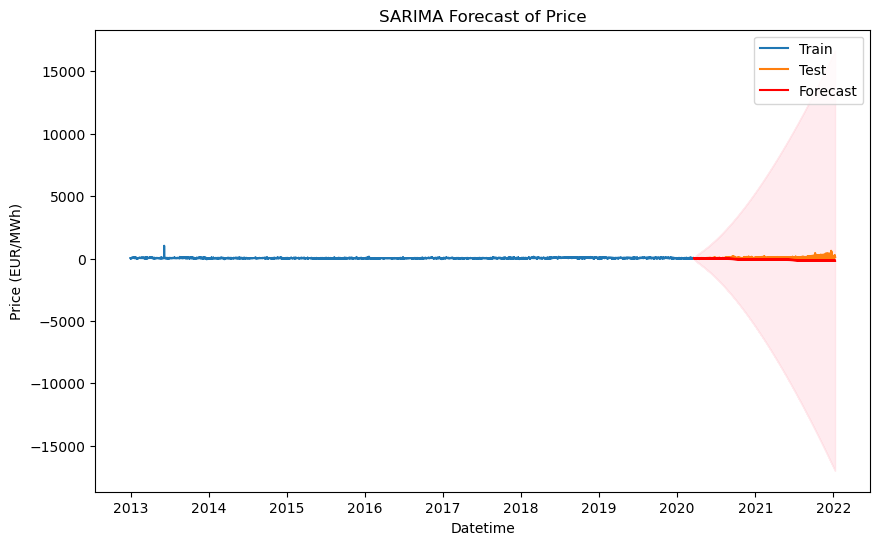

In [82]:
# Make predictions (out-of-sample)
forecast = sarima_result.get_forecast(steps=len(test))

forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train_price, label='Train')
plt.plot(test.index, test_price, label='Test')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_mean.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('SARIMA Forecast of Price')
plt.xlabel('Datetime')
plt.ylabel('Price (EUR/MWh)')
plt.show()

In [83]:
# Check if there are NaN values in the forecast and test data
print(f"NaN values in forecast: {forecast_mean.isna().sum()}")
print(f"NaN values in test data: {test_price.isna().sum()}")


NaN values in forecast: 0
NaN values in test data: 2


In [84]:
test_price = test_price.ffill()  # Forward fill NaN values in test data


In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Recalculate the evaluation metrics
mae = mean_absolute_error(test_price, forecast_mean)
mse = mean_squared_error(test_price, forecast_mean)
rmse = np.sqrt(mse)

# Display the results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 146.29023966566734
Mean Squared Error (MSE): 32092.660830175326
Root Mean Squared Error (RMSE): 179.14424587514756
